In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Overview

In [2]:
df = pd.read_csv('telco.csv')
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Preprocessing

In [6]:
# Handling missing values
df.sort_values(by = 'TotalCharges')['TotalCharges']

# There are missing values and the datatype is also object.

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
df.loc[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
tc_null = set(df.loc[df['TotalCharges'] == ' ']['customerID'].values)
tc_null

{'1371-DWPAZ',
 '2520-SGTTA',
 '2775-SEFEE',
 '2923-ARZLG',
 '3115-CZMZD',
 '3213-VVOLG',
 '4075-WKNIU',
 '4367-NUYAO',
 '4472-LVYGI',
 '5709-LVOEQ',
 '7644-OMVMY'}

In [9]:
te_null = df.loc[df['tenure'] == 0]['customerID'].values
te_null

array(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'], dtype=object)

In [10]:
len(tc_null.difference(te_null))

0

In [11]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x))
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df['Churn_num'] = df['Churn'].map({'Yes' : 1, 'No' : 0})
df.to_csv('telco_modified.csv', index = False)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### EDA

In [13]:
df.groupby('tenure').agg({'Churn_num' : np.mean})

,Churn_num
tenure,
0,0.000000
1,0.619902
2,0.516807
3,0.470000
4,0.471591
...,...
68,0.090000
69,0.084211
70,0.092437


<AxesSubplot:xlabel='tenure', ylabel='Churn_num'>

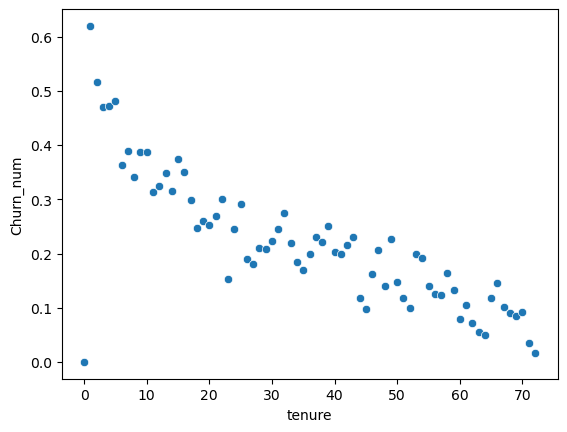

In [14]:
te_ch = df.groupby('tenure').agg({'Churn_num' : np.mean}).reset_index()
sns.scatterplot(data = te_ch, x = 'tenure', y = 'Churn_num')

# Churn gets lower when the tenure gets long.

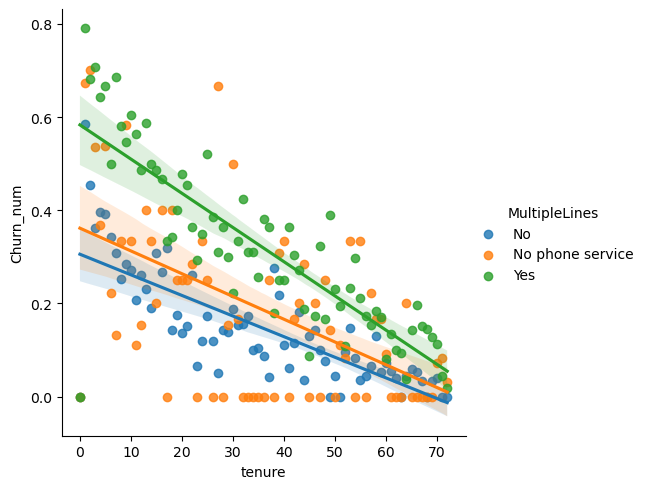

In [15]:
hue = 'MultipleLines'

te_ch = df.groupby(['tenure', hue]).agg({'Churn_num' : np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)


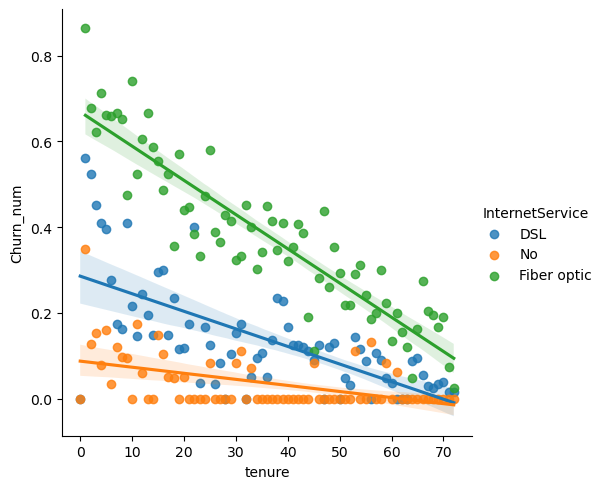

In [16]:
hue = 'InternetService'

te_ch = df.groupby(['tenure', hue]).agg({'Churn_num' : np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

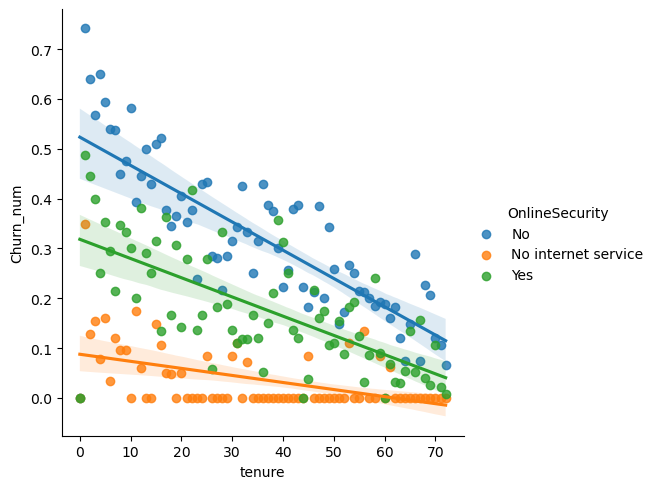

In [17]:
hue = 'OnlineSecurity'

te_ch = df.groupby(['tenure', hue]).agg({'Churn_num' : np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

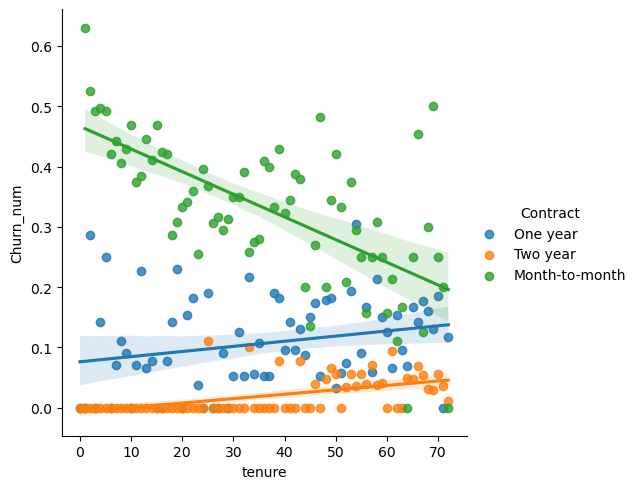

In [18]:
hue = 'Contract'

te_ch = df.groupby(['tenure', hue]).agg({'Churn_num' : np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)


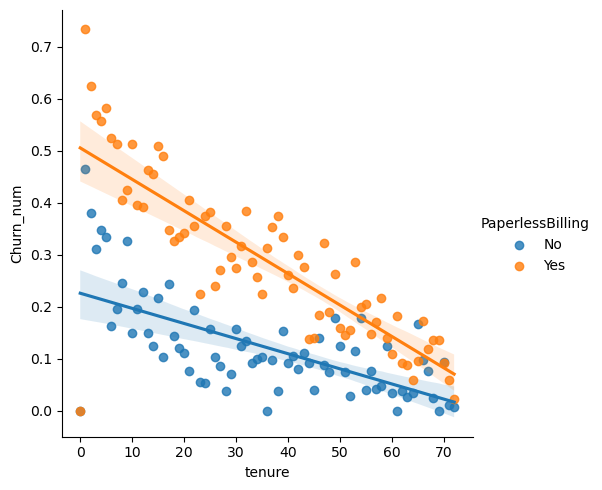

In [19]:
hue = 'PaperlessBilling'

te_ch = df.groupby(['tenure', hue]).agg({'Churn_num' : np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

### Data Preparation

In [20]:
# Feature scaling
scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for tgt_col in scal_cols:
    minus_min = df[tgt_col] - np.min(df[tgt_col]) 
    scaled = minus_min / np.max(minus_min)
    df[tgt_col + '_mm_scale'] = scaled

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_mm_scale,MonthlyCharges_mm_scale,TotalCharges_mm_scale
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,0.462803,0.262497
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,0.299403,0.261007
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,0.171642,0.045891
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,0.518408,0.160574
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,0.712438,0.436003
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Converting yes/no to 1/0
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for tgt in yes_no_cols:
    mapper = {'No' : 0, 'Yes' : 1}
    df[tgt + '_num'] = df[tgt].map(mapper)

In [23]:
set(df['InternetService'])

{'DSL', 'Fiber optic', 'No'}

In [24]:
mapper = {'No' : 0, 'DSL' : 0.5, 'Fiber optic' : 1}
df['InternetSpeed'] = df['InternetService'].map(mapper)
df.describe()

# Convert features of internet service to numeric

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_mm_scale,MonthlyCharges_mm_scale,TotalCharges_mm_scale,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,0.462803,0.262497,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,0.299403,0.261007,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,0.171642,0.045891,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,0.518408,0.160574,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,0.712438,0.436003,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_num', 'tenure_mm_scale', 'MonthlyCharges_mm_scale',
       'TotalCharges_mm_scale', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [26]:
interested = ['SeniorCitizen', 'Churn_num', 'tenure_mm_scale',
       'MonthlyCharges_mm_scale', 'TotalCharges_mm_scale', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed']
df[interested].to_csv('telco_modified2.csv', index = False)

In [27]:
features = ['SeniorCitizen', 'tenure_mm_scale',
       'MonthlyCharges_mm_scale', 'TotalCharges_mm_scale', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed']
label = 'Churn_num'

x, y = df[features], df[label]

### K-means Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters = 4)
model.fit(x)

KMeans(n_clusters=4)

In [30]:
model.labels_ 

array([2, 0, 1, ..., 3, 2, 1])

In [31]:
df['cluster'] = model.labels_
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn_num,tenure_mm_scale,MonthlyCharges_mm_scale,TotalCharges_mm_scale,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0.013889,0.115423,0.003437,1,0,0,1,0.5,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0.472222,0.385075,0.217564,0,0,1,0,0.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0.027778,0.354229,0.012453,0,0,1,1,0.5,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0.625000,0.239303,0.211951,0,0,0,0,0.5,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0.027778,0.521891,0.017462,0,0,1,1,1.0,1


In [32]:
df.groupby('cluster').agg({label: np.mean})

,Churn_num
cluster,
0,0.196366
1,0.412090
2,0.278201
3,0.138551


In [33]:
np.mean(df[label])

0.2653698707936959

In [34]:
df.loc[df['cluster'] == 2][features].describe()

# The group in which churn rate is the highest
# Usually have phone service, paperless billing, and internet with fast speed

,SeniorCitizen,tenure_mm_scale,MonthlyCharges_mm_scale,TotalCharges_mm_scale,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,0.356401,0.613735,0.646145,0.438417,0.995156,0.029758,0.927336,0.788927,0.815571
std,0.479102,0.324399,0.227306,0.277403,0.069456,0.169977,0.259675,0.408211,0.281099
min,0.000000,0.013889,0.006965,0.002337,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.524876,0.189152,1.000000,0.000000,1.000000,1.000000,0.500000
50%,0.000000,0.694444,0.694527,0.433522,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,0.916667,0.815423,0.676918,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,0.998507,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.loc[df['cluster'] == 1][features].describe()

# The group with the lowest churn rate - partner, dependents

,SeniorCitizen,tenure_mm_scale,MonthlyCharges_mm_scale,TotalCharges_mm_scale,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.0,2167.000000,2167.000000,2167.0,2167.000000
mean,0.199815,0.323130,0.520777,0.205675,0.0,0.076604,0.897554,1.0,0.734887
std,0.399954,0.298770,0.261000,0.226411,0.0,0.266023,0.303304,0.0,0.336281
min,0.000000,0.000000,0.002985,0.000000,0.0,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.055556,0.323134,0.027989,0.0,0.000000,1.000000,1.0,0.500000
50%,0.000000,0.222222,0.567164,0.115282,0.0,0.000000,1.000000,1.0,1.000000
75%,0.000000,0.541667,0.718408,0.313637,0.0,0.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,0.999005,0.984150,0.0,1.000000,1.000000,1.0,1.000000


<AxesSubplot:xlabel='mean', ylabel='index'>

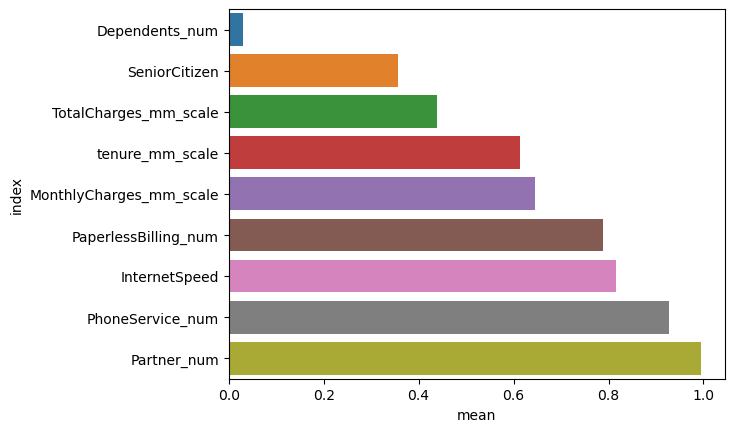

In [36]:
for_plot = df.loc[df['cluster'] == 2][features].describe().T['mean'].reset_index()
sns.barplot(data = for_plot.sort_values(by = 'mean'), x = 'mean', y = 'index')

<AxesSubplot:xlabel='mean', ylabel='index'>

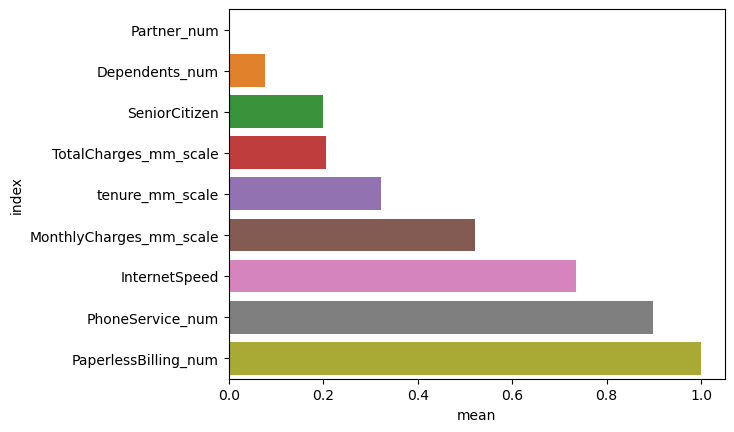

In [37]:
for_plot = df.loc[df['cluster'] == 1][features].describe().T['mean'].reset_index()
sns.barplot(data = for_plot.sort_values(by = 'mean'), x = 'mean', y = 'index')

### Summary
- The churn rate tends to be high in which customers use paperless billing, phone service, and so on.
- On the other hand. the churn rate could be low when the customers have dependents or partners.